In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging

import dataset
import dataset_misc1d
import dataset_misc2d
from backprop import backprop
from backprop import gp, srgp, cmgp, crossover, selector, library

SAMPLE_SIZE = 200
NOISE = 0.0#3

POPSIZE = 1000
MAX_STREE_DEPTH = 5
GENERATIONS = 10
GROUP_SIZE = 5  # tournament selector.
MUTATION_RATE = 0.15
ELITISM = 1
BACKPROP_INTV = -1

NBESTS = 4

#logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

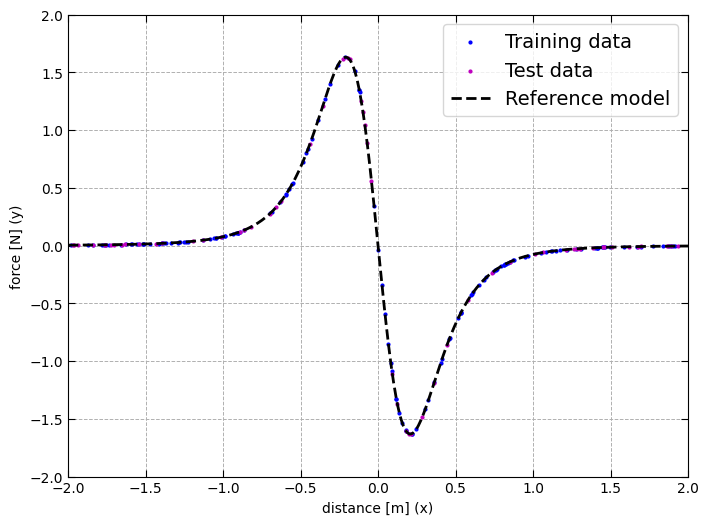

In [2]:
S = dataset_misc1d.MagmanDatasetScaled()
#S = dataset_misc2d.Resistance2()
S.sample(size=SAMPLE_SIZE, noise=NOISE, mesh=False)
#S.load('../data/magman.csv')
S.split()
S.get_plotter().plot(width=8, height=6, plot_knowldege=False)

S_train = dataset.NumpyDataset(S)
S_test  = dataset.NumpyDataset(S, test=True)

In [3]:
lib = library.Library(2000, 3, S_train)

solutionCreator = gp.RandomSolutionCreator(nvars=S.nvars)

multiMutator = gp.MultiMutator(
      gp.SubtreeReplacerMutator(MAX_STREE_DEPTH, solutionCreator),
      gp.FunctionSymbolMutator(),
      gp.NumericParameterMutator(all=True),
      gp.NumericParameterMutator(all=False)
      )

evaluator = gp.R2Evaluator(S_train)
#evaluator = gp.FUEvaluator(S_train, S.knowledge)

selector = gp.TournamentSelector(GROUP_SIZE)

#crossover2 = gp.SubTreeCrossover(MAX_STREE_DEPTH)
crossover2 = crossover.ApproxGeometricCrossover(lib, MAX_STREE_DEPTH)

symb_regressor = \
         gp.GP(POPSIZE, GENERATIONS, MAX_STREE_DEPTH, S_train, S_test,
               creator=solutionCreator,
               evaluator=evaluator,
               selector=selector,
               crossover=crossover2,
               mutator=multiMutator,
               mutrate=MUTATION_RATE,
               elitism=ELITISM,
               backprop_intv=BACKPROP_INTV,
               knowledge=S.knowledge,
               nbests=NBESTS)

with np.errstate(all='ignore'):
      bests, eval_map = symb_regressor.evolve()
best_stree = bests[0]
best_eval = eval_map[id(best_stree)]

print("--- Best syntax tree ---")
print(best_stree)
print(best_eval)

c:\Users\Agostino\Desktop\Master\DualDegree\Thesis\symbreg\src\backprop\backprop.py:575: RuntimeWarning: invalid value encountered in log
  if self.operator == 'log'   : return np.log (inner)
c:\Users\Agostino\Desktop\Master\DualDegree\Thesis\symbreg\src\backprop\backprop.py:575: RuntimeWarning: divide by zero encountered in log
  if self.operator == 'log'   : return np.log (inner)
c:\Users\Agostino\Desktop\Master\DualDegree\Thesis\symbreg\src\backprop\backprop.py:576: RuntimeWarning: invalid value encountered in sqrt
  if self.operator == 'sqrt'  : return np.sqrt(inner)
c:\Users\Agostino\Desktop\Master\DualDegree\Thesis\symbreg\src\backprop\backprop.py:574: RuntimeWarning: overflow encountered in exp
  if self.operator == 'exp'   : return np.exp (inner)


Generation 0
Generation 1 0.0
Generation 2 0.26794481454084185
Generation 3 0.26794481454084185
Generation 4 0.33478753302375464
Generation 5 0.48899987205535267
Generation 6 0.7323058653816537
Generation 7 0.8994220274607361
Generation 8 0.8994220274607361
Generation 9 0.93267697343555
--- Best syntax tree ---
((exp((-0.84 * (x0 * x0))) / (-0.09 - square((x0 / -0.84)))) * (x0 - cube((x0 * 0.77))))
0.9553843481526952


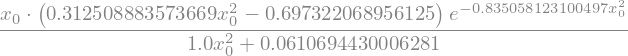

In [4]:
import sympy
sympy.init_printing()
sympy.simplify(sympy.factor(best_stree.to_sympy()))

In [5]:
print(best_stree.simplify())
print(best_stree.get_max_depth())
print(best_stree.get_nnodes())
#from backprop import lpbackprop
#sat, stree_cost = lpbackprop.lpbackprop(S.knowledge, best_stree, None)
#print(sat)

((exp((-0.84 * (x0 * x0))) / (-0.09 - square((x0 / -0.84)))) * (x0 - cube((x0 * 0.77))))
5
20


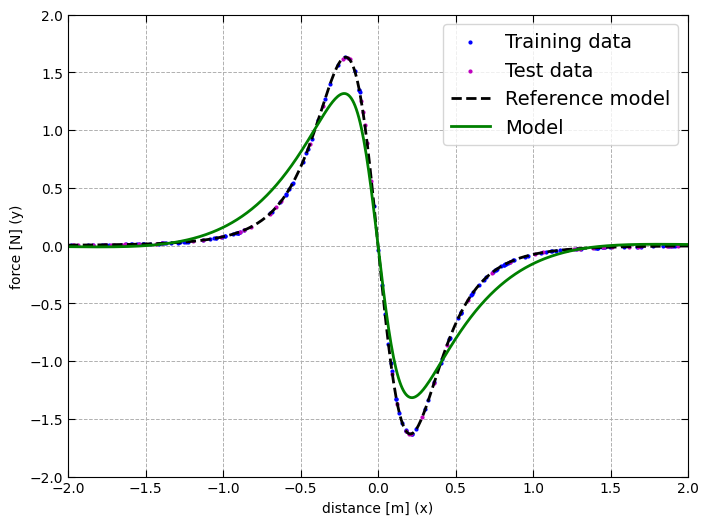

'S.get_plotter().plot(width=8, height=6, plot_knowldege=False, model=best_stree.diff(0).simplify(), zoomout=3)\nS.knowledge.synthesize(best_stree, S_train.X).get_plotter().plot(width=8, height=6)\n\nK_evaluator = gp.FUEvaluator(S_train, S.knowledge)\nprint(K_evaluator.evaluate(best_stree))\n\nprint(best_stree.diff(0))\nprint(best_stree.diff(0).simplify())'

In [10]:
S.get_plotter().plot(width=8, height=6, plot_knowldege=False, model=best_stree, zoomout=1)
"""S.get_plotter().plot(width=8, height=6, plot_knowldege=False, model=best_stree.diff(0).simplify(), zoomout=3)
S.knowledge.synthesize(best_stree, S_train.X).get_plotter().plot(width=8, height=6)

K_evaluator = gp.FUEvaluator(S_train, S.knowledge)
print(K_evaluator.evaluate(best_stree))

print(best_stree.diff(0))
print(best_stree.diff(0).simplify())"""

currBest [0.0, 0.26794481454084185, 0.26794481454084185, 0.33478753302375464, 0.48899987205535267, 0.7323058653816537, 0.8994220274607361, 0.8994220274607361, 0.93267697343555, 0.9553843481526952]
currAvg [0.0, 0.012697941424696145, 0.0936588708421972, 0.0659797153823, 0.06537862876757154, 0.07756232491525034, 0.0949916982383841, 0.11380870732459346, 0.14039907186256295, 0.1905257398499932]
currWorst [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
best [0.0, 0.26794481454084185, 0.26794481454084185, 0.33478753302375464, 0.48899987205535267, 0.7323058653816537, 0.8994220274607361, 0.8994220274607361, 0.93267697343555, 0.9553843481526952]


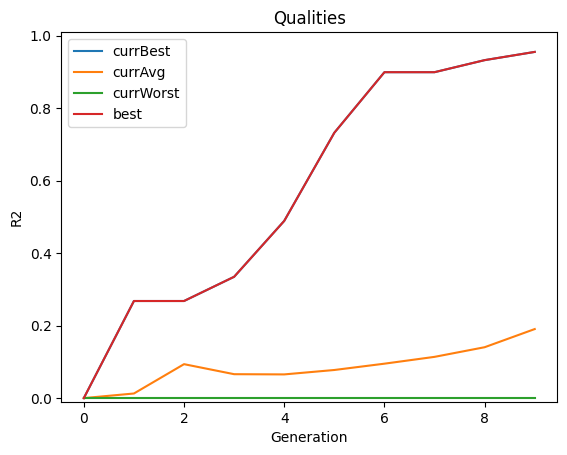

In [7]:
for quality, qseries in symb_regressor.stats.qualities.items():
    plt.plot(qseries, label=quality)
    print(quality, qseries)
plt.legend()
plt.ylim((-0.01, 1.01))
plt.xlabel('Generation')
plt.ylabel('R2')
plt.title('Qualities')
plt.show()

In [8]:
"""plt.plot(symb_regressor.stats.pland, label='pland')

for quality, qseries in symb_regressor.stats.fea_ratio.items():
    plt.plot(qseries, label=quality)

plt.legend()
plt.ylim((-0.01, 1.01))
plt.xlabel('Generation')
plt.ylabel('Ratio')
plt.title('Feasibility')
plt.show()"""

"plt.plot(symb_regressor.stats.pland, label='pland')\n\nfor quality, qseries in symb_regressor.stats.fea_ratio.items():\n    plt.plot(qseries, label=quality)\n\nplt.legend()\nplt.ylim((-0.01, 1.01))\nplt.xlabel('Generation')\nplt.ylabel('Ratio')\nplt.title('Feasibility')\nplt.show()"